# Table of Contents
 <p><div class="lev1"><a href="#phenom-example---compare-with-mathematica-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>phenom example - compare with mathematica</a></div><div class="lev2"><a href="#initialise-phenom-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>initialise phenom</a></div><div class="lev2"><a href="#load-mathematica-phenomD-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>load mathematica phenomD</a></div><div class="lev2"><a href="#phase-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>phase</a></div>

# phenom example - compare with mathematica

In [2]:
import phenom

import lal
import lalsimulation as lalsim

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

/Users/sebastian/projects/phenEOB/env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
matplotlib.rcParams.update({'font.size': 16})

## initialise phenom

In [4]:
ph = phenom.PhenomD(m1=10., m2=10., chi1z=0.5, chi2z=0.5, f_min=10, distance=1e6 * lal.PC_SI, delta_f=1/2.)

In [5]:
ph.IMRPhenomDGenerateFD()

In [6]:
ph.flist_Hz

array([   10. ,    10.5,    11. , ...,  2029. ,  2029.5,  2030. ])

In [7]:
ph.flist_Hz.shape

(4041,)

In [8]:
np.savetxt("/Users/sebastian/Desktop/flist.dat", ph.flist_Hz)

In [9]:
ph.htilde

array([  1.17889584e-20 +2.95731481e-20j,
        -1.78115913e-20 -2.42162858e-20j,
         2.45220859e-20 -1.44457339e-20j, ...,
         3.04448285e-27 -8.01772689e-27j,
         2.92315206e-27 -8.02580548e-27j,   2.80221056e-27 -8.03221158e-27j])

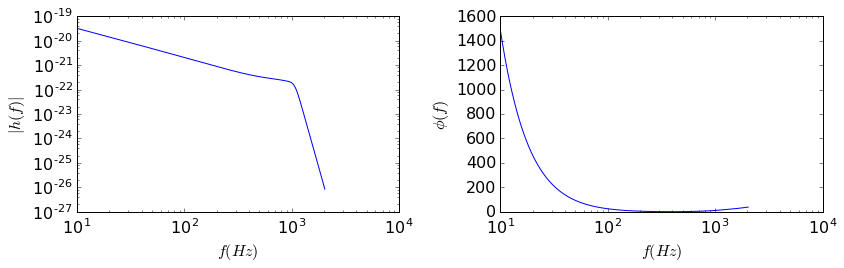

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(ph.flist_Hz, np.absolute(ph.htilde))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$f(Hz)$')
ax[0].set_ylabel('$|h(f)|$')

ax[1].plot(ph.flist_Hz, ph.phase)
ax[1].set_xscale('log')
ax[1].set_xlabel('$f(Hz)$')
ax[1].set_ylabel('$\phi(f)$')

fig.tight_layout()

## load mathematica phenomD

In [11]:
mma_amp = np.loadtxt("mma_amp.dat")

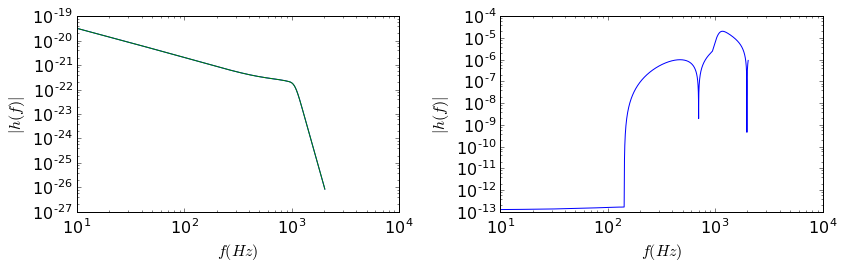

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(ph.flist_Hz, np.absolute(ph.htilde))
ax[0].plot(ph.flist_Hz, mma_amp)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$f(Hz)$')
ax[0].set_ylabel('$|h(f)|$')

ax[1].plot(ph.flist_Hz, np.abs(np.absolute(ph.htilde) - mma_amp) / mma_amp)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$f(Hz)$')
ax[1].set_ylabel('$|h(f)|$')

fig.tight_layout()

## phase

In [13]:
mma_phase = np.loadtxt("mma_phase.dat")

In [14]:
from phenom.utils.utils import HztoMf

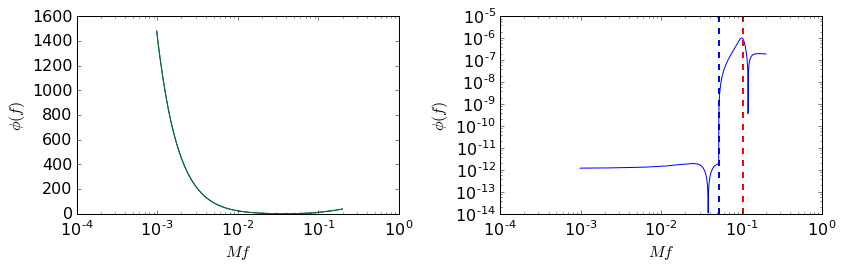

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(HztoMf(ph.flist_Hz, ph.p['Mtot']), ph.phase)
ax[0].plot(HztoMf(ph.flist_Hz, ph.p['Mtot']), mma_phase)
ax[0].set_xscale('log')
# ax[0].set_yscale('log')
ax[0].set_xlabel('$Mf$')
ax[0].set_ylabel('$\phi(f)$')

ax[1].plot(HztoMf(ph.flist_Hz, ph.p['Mtot']), np.abs(ph.phase - mma_phase) / mma_phase)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$Mf$')
ax[1].set_ylabel('$\phi(f)$')
ax[1].axvline(x=ph.p['fRD'],linewidth=2, color='r', ls='--')
ax[1].axvline(x=0.5*ph.p['fRD'],linewidth=2, color='b', ls='--')

fig.tight_layout()